In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [3]:
# Student data filepath
student_data_path = "data/StudentPerformanceFactors.csv"

# Student data dataframe created by reading the CSV with pandas
student_df = pd.read_csv(student_data_path)


In [4]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [5]:
exam_score_sorted_df = student_df.sort_values(["Exam_Score"], ascending=False)
A_grade_dataframe = exam_score_sorted_df[(student_df["Exam_Score"] >= 90)]
A_grade_dataframe.head()

C:\Users\crwil\AppData\Local\Temp\ipykernel_19720\1860962614.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  A_grade_dataframe = exam_score_sorted_df[(student_df["Exam_Score"] >= 90)]


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
6393,16,83,Low,Medium,Yes,8,92,Low,Yes,2,High,High,Public,Positive,4,No,Postgraduate,Near,Female,98


In [6]:
correlation = A_grade_dataframe['Sleep_Hours'].corr(A_grade_dataframe['Attendance'])
print("\nCorrelation between Sleep Hours and Attendance:")
print("-" * 40)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")



Correlation between Sleep Hours and Attendance:
----------------------------------------
Pearson Correlation Coefficient: -0.2543


In [7]:
correlation = A_grade_dataframe['Sleep_Hours'].corr(A_grade_dataframe['Attendance'])
print("\nCorrelation between Sleep Hours and Attendance:")
print("-" * 40)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")



Correlation between Sleep Hours and Attendance:
----------------------------------------
Pearson Correlation Coefficient: -0.2543


In [8]:
student_df['Sleep_Status'] = np.where(student_df['Sleep_Hours'] >= 8, 'Adequate', 'Inadequate')
student_df['Attendance_Status'] = np.where(student_df['Attendance'] >= student_df['Attendance'].mean(), 
                                 'Above Average', 'Below Average')

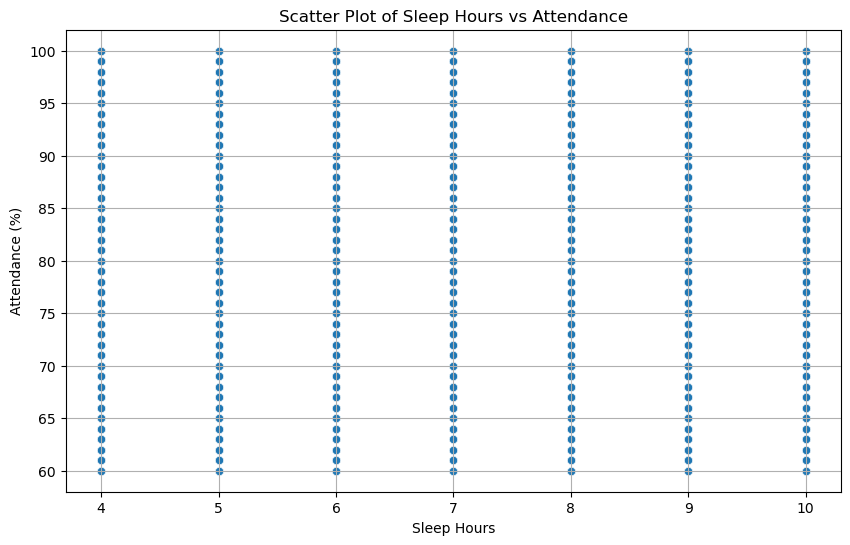

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=student_df, x='Sleep_Hours', y='Attendance')
plt.title('Scatter Plot of Sleep Hours vs Attendance')
plt.xlabel('Sleep Hours')
plt.ylabel('Attendance (%)')
plt.grid(True)
plt.show()

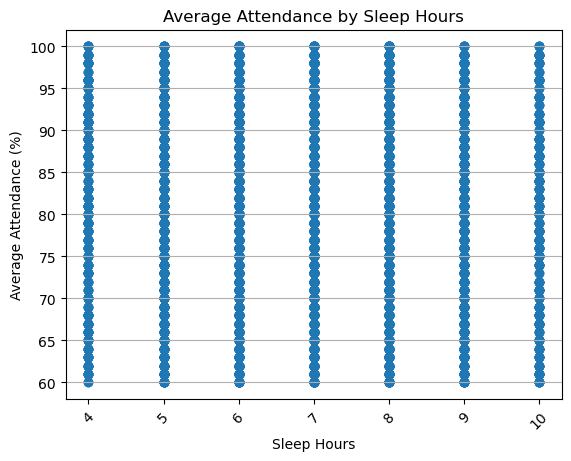

In [10]:
sleephours_attendance=student_df[["Sleep_Hours","Attendance"]]
plt.scatter(sleephours_attendance["Sleep_Hours"],sleephours_attendance["Attendance"])
plt.title('Average Attendance by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Attendance (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

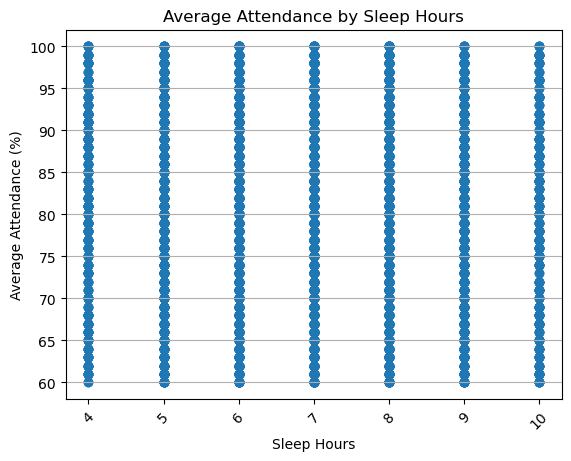

In [11]:
sleephours_attendance=student_df[["Sleep_Hours","Attendance"]]
plt.scatter(sleephours_attendance["Sleep_Hours"],sleephours_attendance["Attendance"])
plt.title('Average Attendance by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Attendance (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

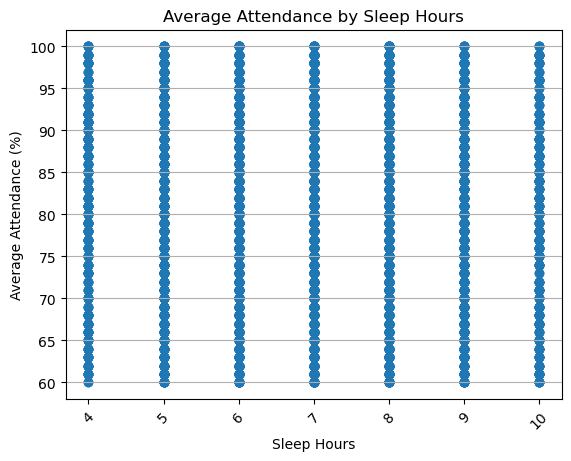

In [12]:
# Ensure correct data extraction
sleep_hours = student_df['Sleep_Hours']
attendance = student_df['Attendance']#.unique()

# Create scatter plot
plt.scatter(sleep_hours, attendance)
plt.title('Average Attendance by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Attendance (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [13]:
correlation = A_grade_dataframe['Sleep_Hours'].corr(A_grade_dataframe['Attendance'])
print("\nCorrelation between Sleep Hours and Attendance:")
print("-" * 40)
print(f"Pearson Correlation Coefficient: {correlation:.4f}")



Correlation between Sleep Hours and Attendance:
----------------------------------------
Pearson Correlation Coefficient: -0.2543


In [14]:
full_corr = A_grade_dataframe.corr(numeric_only=True)
full_corr

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.110806,0.262609,0.103832,-0.295055,0.267365,0.029447
Attendance,-0.110806,1.000000,-0.254256,0.220978,0.189593,-0.312817,0.479848
Sleep_Hours,0.262609,-0.254256,1.000000,-0.038965,-0.104749,0.212199,-0.206774
Previous_Scores,0.103832,0.220978,-0.038965,1.000000,-0.070303,-0.428241,0.424273
Tutoring_Sessions,-0.295055,0.189593,-0.104749,-0.070303,1.000000,-0.079875,0.343184
Physical_Activity,0.267365,-0.312817,0.212199,-0.428241,-0.079875,1.000000,-0.314403
Exam_Score,0.029447,0.479848,-0.206774,0.424273,0.343184,-0.314403,1.000000


[]

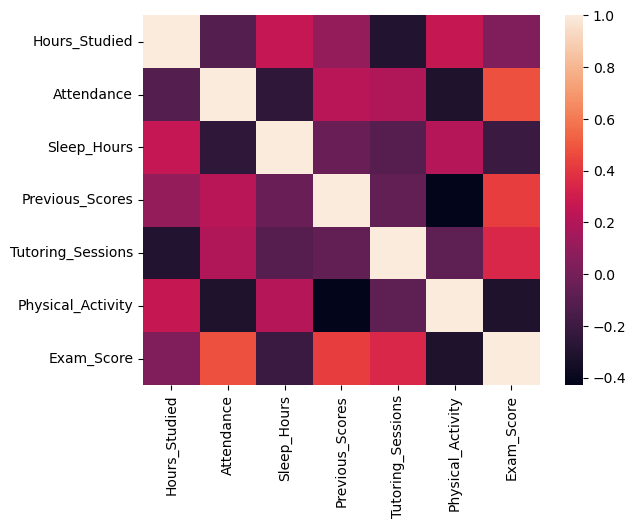

In [15]:
sns.heatmap(full_corr)
plt.savefig("plots/correlation_heatmap.png")
plt.plot()

In [16]:
exam_score_corr_s = full_corr["Exam_Score"].drop(labels="Exam_Score").sort_values(ascending=False)
exam_score_corr_s

Attendance           0.479848
Previous_Scores      0.424273
Tutoring_Sessions    0.343184
Hours_Studied        0.029447
Sleep_Hours         -0.206774
Physical_Activity   -0.314403
Name: Exam_Score, dtype: float64

In [17]:
print(exam_score_corr_s.index)
print(exam_score_corr_s.values)

Index(['Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Hours_Studied',
       'Sleep_Hours', 'Physical_Activity'],
      dtype='object')
[ 0.47984843  0.42427287  0.3431839   0.02944736 -0.20677396 -0.31440316]


[]

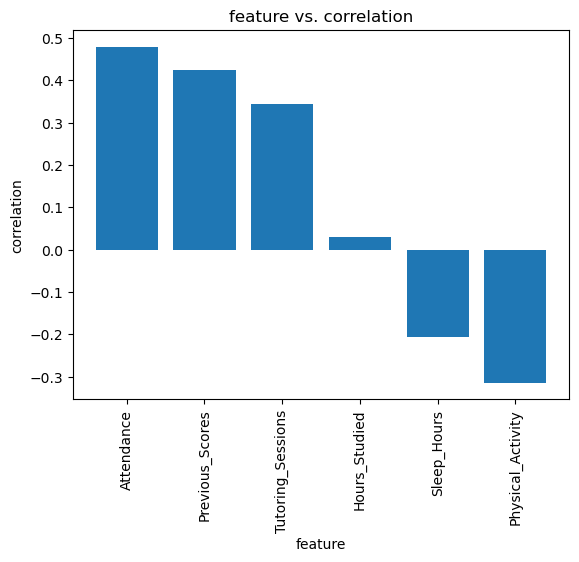

In [18]:
plt.bar(exam_score_corr_s.index, exam_score_corr_s.values)
plt.xticks(rotation=90)
plt.plot() 
plt.xlabel('feature')
plt.ylabel('correlation')
plt.title("feature vs. correlation")
plt.savefig("plots/correlation_bar.png")
plt.plot()

[]

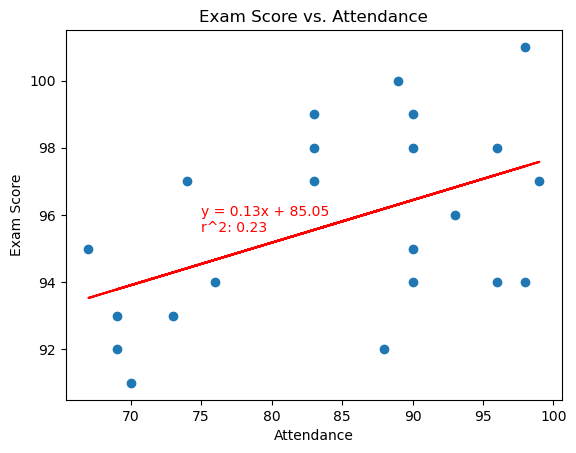

In [19]:
slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Attendance'], A_grade_dataframe['Exam_Score'])
#print(slope, intercept, rvalue, _)
line_y_values = (slope * A_grade_dataframe['Attendance']) + intercept
plt.plot(A_grade_dataframe['Attendance'], line_y_values, color="red")
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}\nr^2: {round(rvalue**2, 2)}" 
plt.annotate(line_equation, [75, 95.5], color="red")
#slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Attendance'], A_grade_dataframe['Exam_Score'])
plt.scatter(A_grade_dataframe['Attendance'], A_grade_dataframe['Exam_Score'])
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title("Exam Score vs. Attendance")
plt.savefig("plots/exam_score_vs_attendance.png")
plt.plot()

[]

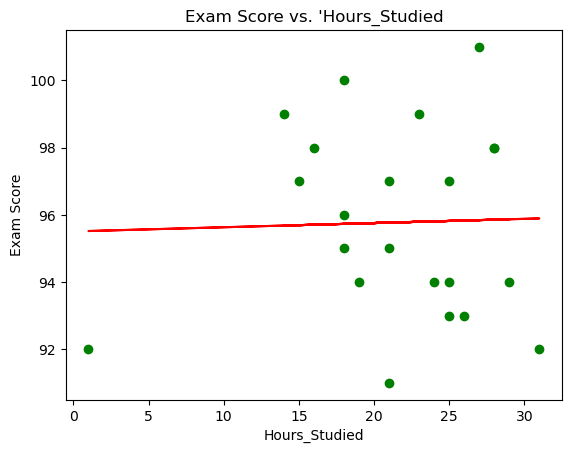

In [20]:

slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Hours_Studied'], A_grade_dataframe['Exam_Score'])
#print(slope, intercept, rvalue, _)
line_y_values = (slope * A_grade_dataframe['Hours_Studied']) + intercept
plt.plot(A_grade_dataframe['Hours_Studied'], line_y_values, color="red")
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}\nr^2: {round(rvalue**2, 2)}" 
plt.annotate(line_equation, [60, 95.5], color="red")
#slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Hours_Studied'], A_grade_dataframe['Exam_Score'])
plt.scatter(A_grade_dataframe['Hours_Studied'], A_grade_dataframe['Exam_Score'], color="green")
plt.xlabel('Hours_Studied')
plt.ylabel('Exam Score')
plt.title("Exam Score vs. 'Hours_Studied")
plt.savefig("plots/exam_score_vs_hours_studied.png")
plt.plot()

[]

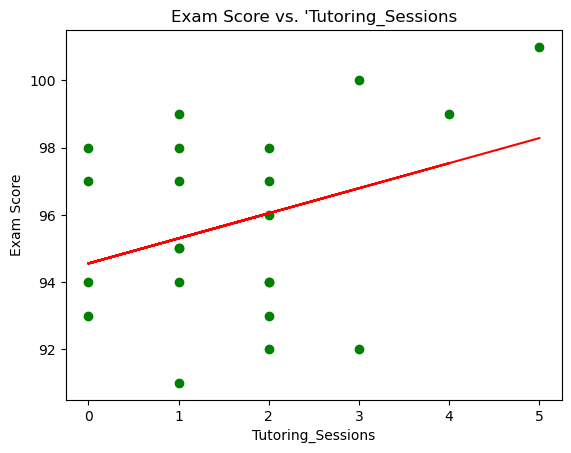

In [22]:
slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Tutoring_Sessions'], A_grade_dataframe['Exam_Score'])
#print(slope, intercept, rvalue, _)
line_y_values = (slope * A_grade_dataframe['Tutoring_Sessions']) + intercept
plt.plot(A_grade_dataframe['Tutoring_Sessions'], line_y_values, color="red")
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}\nr^2: {round(rvalue**2, 2)}" 
plt.annotate(line_equation, [60, 95.5], color="red")
#slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Hours_Studied'], A_grade_dataframe['Exam_Score'])
plt.scatter(A_grade_dataframe['Tutoring_Sessions'], A_grade_dataframe['Exam_Score'], color="green")
plt.xlabel('Tutoring_Sessions')
plt.ylabel('Exam Score')
plt.title("Exam Score vs. 'Tutoring_Sessions")
plt.savefig("plots/exam_score_vs_tutoring_sessions.png")
plt.plot()

[]

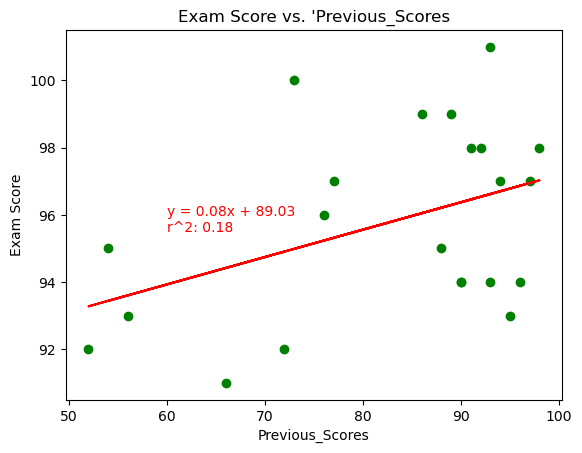

In [21]:
slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Previous_Scores'], A_grade_dataframe['Exam_Score'])
#print(slope, intercept, rvalue, _)
line_y_values = (slope * A_grade_dataframe['Previous_Scores']) + intercept
plt.plot(A_grade_dataframe['Previous_Scores'], line_y_values, color="red")
line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}\nr^2: {round(rvalue**2, 2)}" 
plt.annotate(line_equation, [60, 95.5], color="red")
#slope, intercept, rvalue, _, _ = linregress(A_grade_dataframe['Previous_Scores'], A_grade_dataframe['Exam_Score'])
plt.scatter(A_grade_dataframe['Previous_Scores'], A_grade_dataframe['Exam_Score'], color="green")
plt.xlabel('Previous_Scores')
plt.ylabel('Exam Score')
plt.title("Exam Score vs. 'Previous_Scores")
plt.savefig("plots/exam_score_vs_previous_scores.png")
plt.plot()